## Alpha Calculations
two main approaches:

$$ \alpha _O = \dfrac{(\dfrac{\delta q_{O.sat}}{q_{O.sat}})}{\delta T_O} $$

$$ \alpha _L = \dfrac{(\dfrac{\delta q_{L.sat}^x}{q_{L.sat}^x})}{\delta T_L^x}  $$

And from Held and Soden 2006:

$$\alpha(T) = \dfrac{d\ln e_s}{dT} = \dfrac{L}{R_vT^2} \therefore$$

$$\dfrac{1}{e_s} \dfrac{de_s}{dT} = \dfrac{\delta e_s}{e_s} = \dfrac{L}{R_vT^2} \delta T$$

In [51]:
import math
import xarray as xr
import numpy as np
import calendar
import pandas as pd
import datetime
import os
import cftime
import matplotlib.pyplot as plt
from scipy import stats
import sys
import seaborn as sns
from scipy.stats import linregress, pearsonr
sys.path.append('/home/users/chingosa/Functions/')
import CMIPFuncs as func
from multiprocessing import Pool, cpu_count
allow_rechunk=True


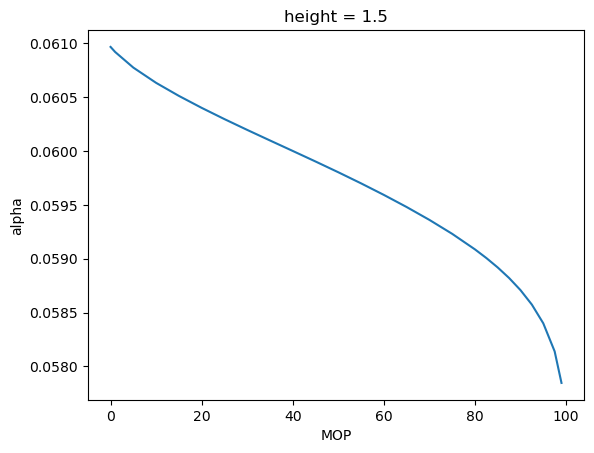

In [64]:
ds = xr.open_dataset('tas_hist_HadGEM3-GC31-LL.nc')
ds['alpha'] = 2500000/(461.5 * (ds['tas_MOP_land']**2))
ds.alpha.weighted(ds.landFracWeight * ds.latWeight).mean('lat').plot()

In [63]:
ds

<xarray.Dataset> Size: 27MB
Dimensions:          (time: 7559, bnds: 2, lat: 32, lon: 192, MOP: 26)
Coordinates:
  * time             (time) object 60kB 1980-01-01 12:00:00 ... 2000-12-29 12...
  * lat              (lat) float64 256B -19.38 -18.12 -16.88 ... 18.12 19.38
  * lon              (lon) float64 2kB 0.9375 2.812 4.688 ... 355.3 357.2 359.1
    height           float64 8B ...
  * MOP              (MOP) float64 208B 0.001 1.0 5.0 10.0 ... 95.0 97.5 99.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds        (time, bnds) object 121kB ...
    lat_bnds         (time, lat, bnds) float64 4MB ...
    lon_bnds         (time, lon, bnds) float64 23MB ...
    landseamask      (lat, lon) float64 49kB ...
    latWeight        (lat) float64 256B ...
    landFracWeight   (lat) float64 256B ...
    oceanFracWeight  (lat) float64 256B ...
    tas_MOP_land     (lat, MOP) float64 7kB 295.1 295.3 295.8 ... 309.2 310.0
    tas_MOP_ocean    (lat, MOP) float64 7kB ...
    meanLandTemp_x   (MOP) float64 208B ...
    meanOceanTemp_x  (MOP) float64 208B ...
    alpha            (lat, MOP) float64 7kB 0.06223 0.06214 ... 0.05666 0.05636
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-06-19T14:19:40Z
    ...                     ...
    title:                  HadGEM3-GC31-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/2e2594b1-6c0f-445f-8d56-98010212540e